In [20]:
import os
import numpy as np
import cv2
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [21]:
#function to normalize, resize and reduce noise
def load_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=target_size)  
            img_array = img_to_array(img) / 255.0  
            
            img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
            img_denoised = cv2.fastNlMeansDenoisingColored(img_cv2, None, 10, 10, 7, 21)
            
            img_denoised = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2RGB)
            img_array_denoised = img_to_array(img_denoised) / 255.0
            
            images.append(img_array_denoised)
    return images, [label] * len(images)


In [22]:
data_path='e:\\Gatech\\ISYE6740\\data'
subfolders = ['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']
x_data = []
y_data = []

for i, subfolder in enumerate(subfolders):
    train_good_folder = os.path.join(data_path, subfolder, 'train', 'good')
    test_good_folder = os.path.join(data_path, subfolder, 'test', 'good')
    
    train_good_images, train_good_labels = load_images_from_folder(train_good_folder, i * 2 + 1)
    test_good_images, test_good_labels = load_images_from_folder(test_good_folder, i * 2 + 1)
    
    x_data.extend(train_good_images)
    y_data.extend(train_good_labels)
    
    x_data.extend(test_good_images)
    y_data.extend(test_good_labels)

    test_folder = os.path.join(data_path, subfolder, 'test')
    for defect_type in os.listdir(test_folder):
        if defect_type != 'good':
            defect_folder = os.path.join(test_folder, defect_type)
            defect_images, defect_labels = load_images_from_folder(defect_folder, i * 2)
            x_data.extend(defect_images)
            y_data.extend(defect_labels)

In [23]:
x_data = np.array(x_data)
y_data = np.array(y_data)

data_new = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in data_new.split(x_data, y_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

In [59]:
np.where(y_train == 28)[0]

array([  27,   61,   99,  100,  147,  152,  195,  267,  309,  430,  584,
        610,  651,  655,  671,  746,  765,  809,  923,  927,  943,  977,
        980,  992,  999, 1007, 1077, 1096, 1099, 1128, 1178, 1251, 1331,
       1382, 1401, 1539, 1619, 1701, 1745, 1776, 1786, 1838, 1848, 1880,
       1884, 1924, 1972, 1998, 2054, 2056, 2073, 2080, 2092, 2104, 2149,
       2214, 2392, 2449, 2476, 2528, 2539, 2565, 2665, 2781, 2813, 2863,
       2899, 2927, 3009, 3052, 3105, 3121, 3155, 3202, 3237, 3247, 3316,
       3394, 3442, 3472, 3513, 3597, 3611, 3780, 3842, 3887, 3904, 3945,
       3955, 4029, 4068, 4076, 4139, 4200, 4268], dtype=int64)

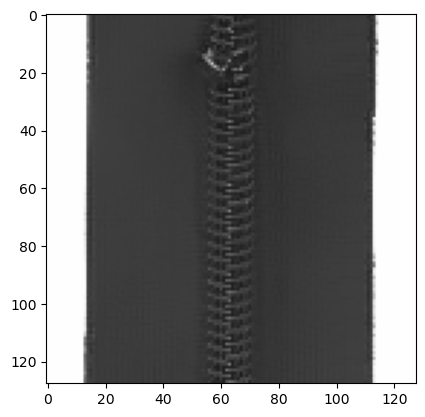

In [61]:
plt.imshow(x_train[61])
plt.show()

In [ ]:
mapping_dict = {
    'defective_bottle': 0,
    'defect_free_bottle': 1,
    'defective_cable': 2,
    'defect_free_cable': 3,
    'defective_capsule': 4,
    'defect_free_capsule': 5,
    'defective_carpet': 6,
    'defect_free_carpet': 7,
    'defective_grid': 8,
    'defect_free_grid': 9,
    'defective_hazelnut': 10,
    'defect_free_hazelnut': 11,
    'defective_leather': 12,
    'defect_free_leather': 13,
    'defective_metal_nut': 14,
    'defect_free_metal_nut': 15,
    'defective_pill': 16,
    'defect_free_pill': 17,
    'defective_screw': 18,
    'defect_free_screw': 19,
    'defective_tile': 20,
    'defect_free_tile': 21,
    'defective_toothbrush': 22,
    'defect_free_toothbrush': 23,
    'defective_transistor': 24,
    'defect_free_transistor': 25,
    'defective_wood': 26,
    'defect_free_wood': 27,
    'defective_zipper': 28,
    'defect_free_zipper': 29
}


In [62]:
import scipy.io
scipy.io.savemat('project_data.mat', {
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
    'y_test': y_test
})